# Metaheuristic Algorithm
1. Simulated Annealing
2. Particle Swarm Algorithm


Reference:
1. https://nlopt.readthedocs.io/en/latest/



Optimal solution: [-0.01021601  0.00214423]
Minimum value: -0.9998864442646603


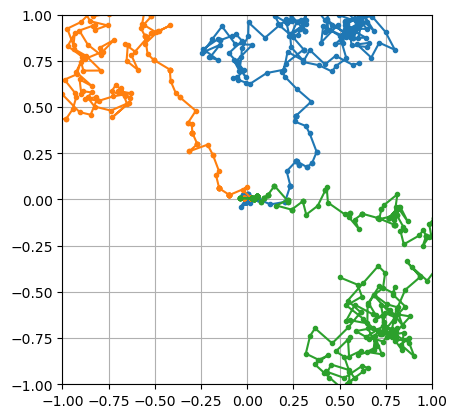

In [25]:
import numpy as np
import random as rd
import math
import matplotlib.pyplot as plt



def simulated_annealing(domain, ini_guess, cost_func, temp=100.0, cool=0.95, step=0.1):
    """
    Simulated Annealing optimization algorithm.

    Args:
        domain (list of tuples): Defines the search space for each parameter.
        cost_func (function): The cost function to be minimized.
        temp (float): Initial temperature (default: 10000.0).
        cool (float): Cooling rate (default: 0.95).
        step (float): Step size for perturbing the solution (default: 1).

    Returns:
        list: Optimal solution (parameters that minimize the cost function).
        
    For cooling schedule, see Peprah, A. , Appiah, S. and Amponsah, S. (2017)
    An Optimal Cooling Schedule Using a Simulated Annealing Based Approach. Applied Mathematics, 8, 1195-1210. doi: 10.4236/am.2017.88090. 
    """
    progress = []
    current_solution = ini_guess
    current_cost = cost_func(current_solution)
    n_iter = 0    
    while temp > 0.0001:

        new_solution = current_solution + [rd.uniform(-1,1) * step, rd.uniform(-1,1) * step]

        if np.all(low <= x <= high for x, (low, high) in zip(new_solution, domain)):
            new_cost = cost_func(new_solution)
            delta_cost = new_cost - current_cost

            if delta_cost < 0 or random.random() < np.exp(-delta_cost / temp):
                current_solution = new_solution
                current_cost = new_cost

        temp *= cool
        n_iter = n_iter + 1
        progress.append(current_solution)
    progress = np.array(progress)
    return current_solution, progress

# Example usage
# Define the function
def f(x):
    return - np.exp(-x[0]**2 - 2 * x[1]**2) 

domain = [(-1, 1)] * 2  # Example: 2D search space [-1, 1] x [-1, 1]
guess1 = np.array([0.6,0.8])
guess2 = np.array([-0.6,0.8])
guess3 = np.array([0.6,-.5])
optimal_solution, pr1 = simulated_annealing(domain, guess1, f)
print("Optimal solution:", optimal_solution)
print("Minimum value:", f(optimal_solution))
optimal_solution, pr2 = simulated_annealing(domain, guess2, f)
optimal_solution, pr3 = simulated_annealing(domain, guess3, f)
##

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(pr1[:, 0], pr1[:, 1],marker ='.')
ax.plot(pr2[:, 0], pr2[:, 1],marker ='.')
ax.plot(pr3[:, 0], pr3[:, 1],marker ='.')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
# Set the aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')
ax.grid()

Exercise 1 Use simulated annealing to obtain the minimum
of $f(x,y) = (0.8-x)^2 + 10 (y-x^2)^2 $

Plot the trajactory of the optimization. 

Optimal solution: [0.79974037 0.64408494]
Minimum value: 0.0002025920355071211


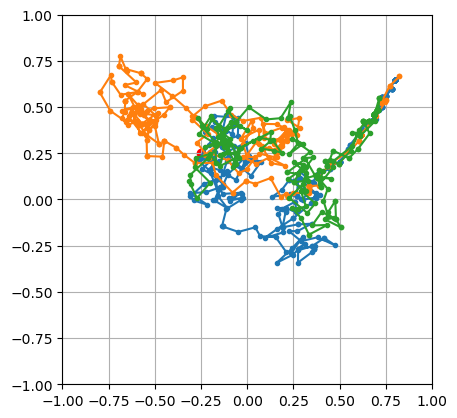

In [88]:
def f(x):
    return  (0.8-x[0])**2 + 10 * (x[1] - x[0]**2)**2 

domain = [(-1, 1)] * 2  # Example: 2D search space [-1, 1] x [-1, 1]
guess = np.array([-0.25,.25])
optimal_solution, pr1 = simulated_annealing(domain, guess, f)
print("Optimal solution:", optimal_solution)
print("Minimum value:", f(optimal_solution))
optimal_solution, pr2 = simulated_annealing(domain, guess, f)
optimal_solution, pr3 = simulated_annealing(domain, guess, f)
##

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(pr1[:, 0], pr1[:, 1],marker ='.')
ax.plot(pr2[:, 0], pr2[:, 1],marker ='.')
ax.plot(pr3[:, 0], pr3[:, 1],marker ='.')
ax.scatter(guess[0],guess[1],marker = 'o', c = 'r')

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
# Set the aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')
ax.grid()

## Particle Swarm Optimization

1. https://www.geeksforgeeks.org/implementation-of-particle-swarm-optimization/
2. https://nathanrooy.github.io/posts/2016-08-17/simple-particle-swarm-optimization-with-python/



In [75]:
# python implementation of particle swarm optimization (PSO)
# minimizing rastrigin
import copy    # array-copying convenience
import sys     # max float
 
def cost_rastrigin(position):
    costVal = 0.0
    for i in range(len(position)):
        xi = position[i]
        costVal += (xi * xi) - (10 * math.cos(2 * math.pi * xi)) + 10
    return costVal

Rastrigin function in $n$-dimension
$$f(\mathbf{x}) = a n + \sum_{i=1}^{n} \left[x_i^2 - a \cos(2\pi x_i)\right] $$
has many local minima and global minimum at $\mathbf{x}=0$.

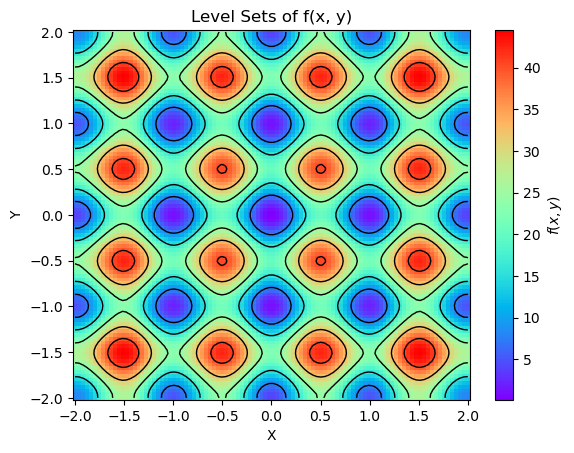

In [84]:
# Generate data for x and y
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
def cost_rastrigin2d(x,y):
    costVal = 0.0
    costVal = x**2 - (10 * np.cos(2 * np.pi * x)) + 10
    costVal = costVal + y**2 - (10 * np.cos(2 * np.pi * y)) + 10
    return costVal

# Compute the function values
Z = cost_rastrigin2d(X,Y)
# Create a filled contour plot
plt.contour(X,Y,Z,linewidths=1,colors='black',levels=5,linestyles='solid')
plt.pcolormesh(X,Y,Z,cmap="rainbow")
plt.colorbar(label=r'$f(x,y)$')


# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Level Sets of f(x, y)')
#plt.xlim([-3,3])
#plt.ylim([-3,3])
# Show the plot
fig.tight_layout()
plt.show()


In [89]:
#particle class 
class Particle:
    def __init__(self, cost, dim, minx, maxx, seed):
        self.rnd = random.Random(seed)
 
    # initialize position of the particle with 0.0 value
        self.position = [0.0 for i in range(dim)]
 
     # initialize velocity of the particle with 0.0 value
        self.velocity = [0.0 for i in range(dim)]
 
    # initialize best particle position of the particle with 0.0 value
        self.best_part_pos = [0.0 for i in range(dim)]
 
    # loop dim times to calculate random position and velocity
    # range of position and velocity is [minx, max]
        for i in range(dim):
            self.position[i] = ((maxx - minx) *
            self.rnd.random() + minx)
            self.velocity[i] = ((maxx - minx) *
            self.rnd.random() + minx)
 
    # compute cost of particle
        self.cost = cost(self.position) # curr cost
 
    # initialize best position and cost of this particle
        self.best_part_pos = copy.copy(self.position) 
        self.best_part_costVal = self.cost # min cost
# particle swarm optimization function
def pso(cost, max_iter, n, dim, minx, maxx):
    # hyper parameters
    w = 0.729    # inertia
    c1 = 1.49445 # cognitive (particle)
    c2 = 1.49445 # social (swarm)
    
    rnd = random.Random()
 
  # create n random particles
    swarm = [Particle(cost, dim, minx, maxx, i) for i in range(n)] 
 
  # compute the value of best_position and best_cost in swarm
    best_swarm_pos = [0.0 for i in range(dim)]
    best_swarm_costVal = sys.float_info.max # swarm best
 
  # computer best particle of swarm and it's cost
    for i in range(n): # check each particle
        if swarm[i].cost < best_swarm_costVal:
            best_swarm_costVal = swarm[i].cost
            best_swarm_pos = copy.copy(swarm[i].position) 
 
  # main loop of pso
    Iter = 0
    while Iter < max_iter:
     
    # after every 10 iterations 
    # print iteration number and min cost value so far
        if Iter % 10 == 0 and Iter > 1:
            print("Iter = " + str(Iter) + " min cost = %.3f" % best_swarm_costVal)
        for i in range(n): # process each particle 
      # compute new velocity of curr particle
            for k in range(dim): 
                r1 = rnd.random()    # randomizations
                r2 = rnd.random()
                swarm[i].velocity[k] = ( 
                                 (w * swarm[i].velocity[k]) +
                                 (c1 * r1 * (swarm[i].best_part_pos[k] - swarm[i].position[k])) + 
                                 (c2 * r2 * (best_swarm_pos[k] -swarm[i].position[k])) 
                               )  
 
 
        # if velocity[k] is not in [minx, max]
        # then clip it 
                if swarm[i].velocity[k] < minx:
                        swarm[i].velocity[k] = minx
                elif swarm[i].velocity[k] > maxx:
                        swarm[i].velocity[k] = maxx
 
 
      # compute new position using new velocity
            for k in range(dim): 
                swarm[i].position[k] += swarm[i].velocity[k]
      # compute cost of new position
            swarm[i].cost = cost(swarm[i].position)
      # is new position a new best for the particle?
            if swarm[i].cost < swarm[i].best_part_costVal:
                swarm[i].best_part_costVal = swarm[i].cost
                swarm[i].best_part_pos = copy.copy(swarm[i].position)
 
      # is new position a new best overall?
            if swarm[i].cost < best_swarm_costVal:
                best_swarm_costVal = swarm[i].cost
                best_swarm_pos = copy.copy(swarm[i].position)
     
    # for-each particle
        Iter += 1
  #end_while
    return best_swarm_pos
# end pso

#----------------------------
# Driver code for rastrigin function
 
print("\nBegin particle swarm optimization on rastrigin function\n")
dim = 2
cost = cost_rastrigin
print("Goal is to minimize Rastrigin's function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (", end="")
for i in range(dim-1):
    print("0, ", end="")
print("0)")
 
num_particles = 10
max_iter = 100
 
print("Setting num_particles = " + str(num_particles))
print("Setting max_iter    = " + str(max_iter))
print("\nStarting PSO algorithm\n")
 
best_position = pso(cost, max_iter, num_particles, dim, -2.0, 2.0)
 
print("\nPSO completed\n")
print("\nBest solution found:")
print(["%.6f"%best_position[k] for k in range(dim)])
costVal = cost(best_position)
print("cost of best solution = %.6f" % costVal)
print("\nEnd particle swarm for rastrigin function\n")


Begin particle swarm optimization on rastrigin function

Goal is to minimize Rastrigin's function in 2 variables
Function has known min = 0.0 at (0, 0)
Setting num_particles = 10
Setting max_iter    = 100

Starting PSO algorithm

Iter = 10 min cost = 1.272
Iter = 20 min cost = 0.566
Iter = 30 min cost = 0.131
Iter = 40 min cost = 0.008
Iter = 50 min cost = 0.001
Iter = 60 min cost = 0.000
Iter = 70 min cost = 0.000
Iter = 80 min cost = 0.000
Iter = 90 min cost = 0.000

PSO completed


Best solution found:
['-0.000015', '0.000002']
cost of best solution = 0.000000

End particle swarm for rastrigin function



Exercise 2 Find the minimizer of the function

$$f(x,y) =  \left[20 - 10 \cos(2\pi x) - 10 \cos(2\pi y)\right] +
(x-1)^2 + (y-2)^2$$